# Model Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [29]:
# Importing metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Hypertuner
from sklearn.model_selection import RandomizedSearchCV

C:\Users\shash\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['math_score'], axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print(f"Categories in 'gender' variable: {df['gender'].unique()}")
print(f"Categories in 'race ethinicity' variable: {df.race_ethnicity.unique()}")
print(f"Categories in 'parental level of education' variable: {df.parental_level_of_education.unique()}")
print(f"Categories in 'lunch' variable: {df.lunch.unique()}")
print(f"Categories in 'test preparation course' variable: {df.test_preparation_course.unique()}")

Categories in 'gender' variable: ['female' 'male']
Categories in 'race ethinicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [8]:
# Wwe will try to predict the maths score
y = df['math_score']

y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [10]:
# Importing on hot encoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [11]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

#### ColumnTransformer - Important

- The ColumnTransformer will combine OneHotEncoder and Stanardization together  

- What a ColumnTransformer allows is to apply a Sklearn’s Transformer only in a group of columns.

- This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

In [12]:
# Kind of Pipelining
preprocessor = ColumnTransformer(transformers=[
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [13]:
# Before transformation
X.shape

(1000, 7)

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
# After transformation
X.shape

(1000, 19)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [25]:
# Evaluation
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_score

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [49]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Training Models
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training Set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
#     print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
#     print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training Set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148


Lasso
Model performance for Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579


Ridge
Model performance for Training Set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111


K-Neighbors Regressor
Model performance for Training Set
- Root Mean Squared Error: 5.7092
- Mean Absolute Error: 4.5180
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2516
- Mean Absolute Error: 5.6160


Decision Tree
Model perf

128:	learn: 5.1087287	total: 305ms	remaining: 2.06s
129:	learn: 5.1040759	total: 308ms	remaining: 2.06s
130:	learn: 5.1003176	total: 310ms	remaining: 2.06s
131:	learn: 5.0958142	total: 312ms	remaining: 2.05s
132:	learn: 5.0921469	total: 315ms	remaining: 2.05s
133:	learn: 5.0852583	total: 318ms	remaining: 2.05s
134:	learn: 5.0792194	total: 320ms	remaining: 2.05s
135:	learn: 5.0764768	total: 323ms	remaining: 2.05s
136:	learn: 5.0721339	total: 325ms	remaining: 2.05s
137:	learn: 5.0670316	total: 328ms	remaining: 2.05s
138:	learn: 5.0613583	total: 330ms	remaining: 2.04s
139:	learn: 5.0567591	total: 332ms	remaining: 2.04s
140:	learn: 5.0502540	total: 334ms	remaining: 2.03s
141:	learn: 5.0483765	total: 335ms	remaining: 2.03s
142:	learn: 5.0426038	total: 337ms	remaining: 2.02s
143:	learn: 5.0374773	total: 340ms	remaining: 2.02s
144:	learn: 5.0323049	total: 342ms	remaining: 2.02s
145:	learn: 5.0259762	total: 344ms	remaining: 2.01s
146:	learn: 5.0195245	total: 346ms	remaining: 2.01s
147:	learn: 

332:	learn: 4.3458527	total: 811ms	remaining: 1.63s
333:	learn: 4.3423734	total: 814ms	remaining: 1.62s
334:	learn: 4.3408144	total: 816ms	remaining: 1.62s
335:	learn: 4.3397071	total: 818ms	remaining: 1.62s
336:	learn: 4.3354308	total: 820ms	remaining: 1.61s
337:	learn: 4.3352189	total: 822ms	remaining: 1.61s
338:	learn: 4.3285072	total: 825ms	remaining: 1.61s
339:	learn: 4.3261407	total: 826ms	remaining: 1.6s
340:	learn: 4.3237856	total: 828ms	remaining: 1.6s
341:	learn: 4.3206325	total: 831ms	remaining: 1.6s
342:	learn: 4.3197372	total: 833ms	remaining: 1.59s
343:	learn: 4.3180009	total: 835ms	remaining: 1.59s
344:	learn: 4.3127136	total: 838ms	remaining: 1.59s
345:	learn: 4.3082208	total: 840ms	remaining: 1.59s
346:	learn: 4.3058909	total: 841ms	remaining: 1.58s
347:	learn: 4.3051379	total: 843ms	remaining: 1.58s
348:	learn: 4.3047872	total: 846ms	remaining: 1.58s
349:	learn: 4.3035013	total: 848ms	remaining: 1.57s
350:	learn: 4.3029381	total: 850ms	remaining: 1.57s
351:	learn: 4.2

544:	learn: 3.8470834	total: 1.3s	remaining: 1.09s
545:	learn: 3.8453974	total: 1.3s	remaining: 1.08s
546:	learn: 3.8419335	total: 1.31s	remaining: 1.08s
547:	learn: 3.8409965	total: 1.31s	remaining: 1.08s
548:	learn: 3.8383560	total: 1.31s	remaining: 1.08s
549:	learn: 3.8334280	total: 1.31s	remaining: 1.07s
550:	learn: 3.8281615	total: 1.32s	remaining: 1.07s
551:	learn: 3.8235024	total: 1.32s	remaining: 1.07s
552:	learn: 3.8200689	total: 1.32s	remaining: 1.07s
553:	learn: 3.8179516	total: 1.32s	remaining: 1.06s
554:	learn: 3.8157860	total: 1.32s	remaining: 1.06s
555:	learn: 3.8150301	total: 1.33s	remaining: 1.06s
556:	learn: 3.8135293	total: 1.33s	remaining: 1.06s
557:	learn: 3.8088813	total: 1.33s	remaining: 1.05s
558:	learn: 3.8087404	total: 1.33s	remaining: 1.05s
559:	learn: 3.8071435	total: 1.34s	remaining: 1.05s
560:	learn: 3.8057335	total: 1.34s	remaining: 1.05s
561:	learn: 3.8033701	total: 1.34s	remaining: 1.05s
562:	learn: 3.8032152	total: 1.34s	remaining: 1.04s
563:	learn: 3.

759:	learn: 3.4170957	total: 1.8s	remaining: 568ms
760:	learn: 3.4143918	total: 1.8s	remaining: 565ms
761:	learn: 3.4142671	total: 1.8s	remaining: 563ms
762:	learn: 3.4119760	total: 1.8s	remaining: 561ms
763:	learn: 3.4086148	total: 1.81s	remaining: 558ms
764:	learn: 3.4079067	total: 1.81s	remaining: 556ms
765:	learn: 3.4074940	total: 1.81s	remaining: 553ms
766:	learn: 3.4062871	total: 1.81s	remaining: 551ms
767:	learn: 3.4046004	total: 1.81s	remaining: 549ms
768:	learn: 3.4040127	total: 1.82s	remaining: 546ms
769:	learn: 3.4003988	total: 1.82s	remaining: 544ms
770:	learn: 3.3997377	total: 1.82s	remaining: 541ms
771:	learn: 3.3991853	total: 1.82s	remaining: 539ms
772:	learn: 3.3972454	total: 1.83s	remaining: 536ms
773:	learn: 3.3962298	total: 1.83s	remaining: 534ms
774:	learn: 3.3940028	total: 1.83s	remaining: 532ms
775:	learn: 3.3896172	total: 1.83s	remaining: 529ms
776:	learn: 3.3854265	total: 1.83s	remaining: 527ms
777:	learn: 3.3850723	total: 1.84s	remaining: 525ms
778:	learn: 3.38

967:	learn: 3.0901507	total: 2.29s	remaining: 75.7ms
968:	learn: 3.0886128	total: 2.29s	remaining: 73.4ms
969:	learn: 3.0871537	total: 2.29s	remaining: 71ms
970:	learn: 3.0858668	total: 2.3s	remaining: 68.6ms
971:	learn: 3.0826691	total: 2.3s	remaining: 66.3ms
972:	learn: 3.0810475	total: 2.3s	remaining: 63.9ms
973:	learn: 3.0796843	total: 2.3s	remaining: 61.5ms
974:	learn: 3.0761343	total: 2.31s	remaining: 59.1ms
975:	learn: 3.0740059	total: 2.31s	remaining: 56.8ms
976:	learn: 3.0729889	total: 2.31s	remaining: 54.4ms
977:	learn: 3.0723443	total: 2.31s	remaining: 52ms
978:	learn: 3.0706544	total: 2.31s	remaining: 49.6ms
979:	learn: 3.0697245	total: 2.32s	remaining: 47.3ms
980:	learn: 3.0677632	total: 2.32s	remaining: 44.9ms
981:	learn: 3.0667379	total: 2.32s	remaining: 42.6ms
982:	learn: 3.0652482	total: 2.32s	remaining: 40.2ms
983:	learn: 3.0631868	total: 2.33s	remaining: 37.8ms
984:	learn: 3.0628804	total: 2.33s	remaining: 35.5ms
985:	learn: 3.0612886	total: 2.33s	remaining: 33.1ms
9

### Results

In [50]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

TypeError: '<' not supported between instances of 'function' and 'function'

## Linear Regression

In [51]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

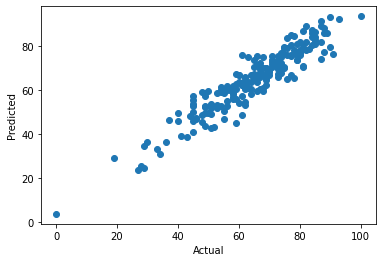

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='math_score'>

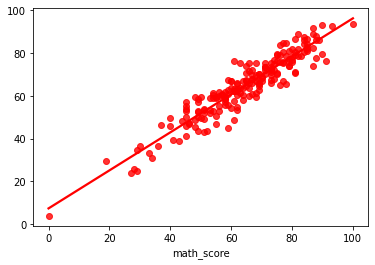

In [53]:
sns.regplot(x=y_test, y=y_pred,ci=None, color='r')

#### Difference between Actual and Predicted Values

In [57]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Differnce':y_test-y_pred})

In [58]:
pred_df

,Actual Value,Predicted Value,Differnce
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
